In [77]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from pycaret.classification import *

Loading the data
and
Basic preprocessing actions (Fitbit)
1. Select experiment dates
2. Drop duplicates
3. Type conversion
4. One hot encoding
5. date_engineering

In [78]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
fitbit = preprocessing_functions.date_engineering(fitbit)
fitbit

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,...,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e301e67b776a240608a72,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,...,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e301367b776a24057738e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e360b67b776a24039709f,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,...,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
5,621e2fce67b776a240279baa,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,...,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4960,621e310d67b776a24003096d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4961,621e324e67b776a2400191cb,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4962,621e30f467b776a240f22944,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,...,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139


# Gender prediction

In [62]:
data = fitbit.drop(columns=['age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [63]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [64]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [65]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9114,0.9627,0.8224,0.9446,0.8516,0.7947,0.8199,0.0200
ridge,Ridge Classifier,0.9113,0.0000,0.8215,0.9459,0.8514,0.7947,0.8201,0.0133
lightgbm,Light Gradient Boosting Machine,0.9036,0.9577,0.8547,0.8772,0.8580,0.7844,0.7925,0.2533
gbc,Gradient Boosting Classifier,0.9029,0.9533,0.8485,0.8806,0.8542,0.7812,0.7915,0.3000
ada,Ada Boost Classifier,0.8899,0.9341,0.7782,0.8860,0.8164,0.7381,0.7526,0.0933
rf,Random Forest Classifier,0.8230,0.9069,0.6723,0.8108,0.7093,0.5875,0.6113,0.0933
dt,Decision Tree Classifier,0.8188,0.8083,0.7563,0.7316,0.7292,0.5943,0.6071,0.0200
et,Extra Trees Classifier,0.7710,0.8783,0.5060,0.7843,0.5552,0.4355,0.4806,0.0833
knn,K Neighbors Classifier,0.7331,0.7335,0.4542,0.6285,0.5226,0.3468,0.3573,0.5800
lr,Logistic Regression,0.6908,0.7269,0.4321,0.3515,0.3855,0.2501,0.2538,0.5700


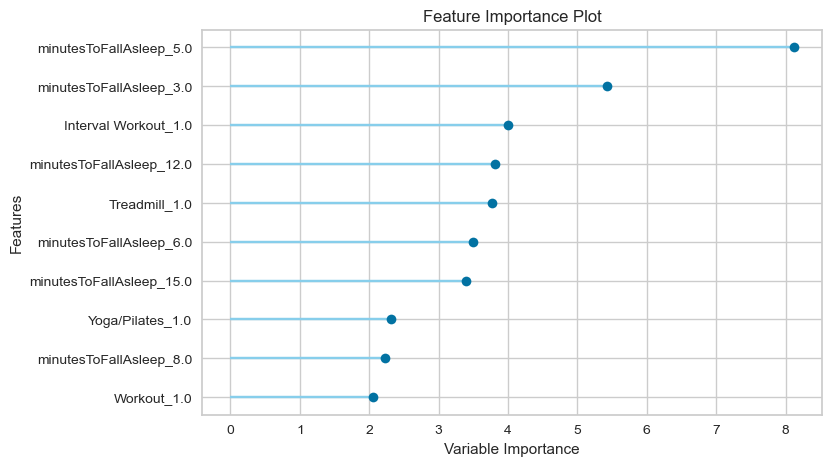

In [66]:
plot_model(best, plot='feature')

In [67]:
data = preprocessing_functions.post_preprocessing(data)

In [68]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [69]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [70]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8239,0.8464,0.7049,0.6555,0.6671,0.5238,0.5352,0.3167
lightgbm,Light Gradient Boosting Machine,0.8110,0.8487,0.6935,0.6318,0.6457,0.4996,0.5109,0.2733
ridge,Ridge Classifier,0.8101,0.0000,0.6873,0.6822,0.6637,0.5128,0.5278,0.0133
lda,Linear Discriminant Analysis,0.8101,0.8664,0.6868,0.6817,0.6641,0.5121,0.5267,0.0200
dt,Decision Tree Classifier,0.7797,0.7417,0.7131,0.5867,0.6252,0.4640,0.4756,0.0200
ada,Ada Boost Classifier,0.7730,0.8297,0.6723,0.6276,0.6013,0.4321,0.4652,0.0900
rf,Random Forest Classifier,0.7561,0.8266,0.4759,0.6164,0.5139,0.3476,0.3686,0.0933
knn,K Neighbors Classifier,0.7269,0.7180,0.4738,0.5822,0.4774,0.3096,0.3394,0.0400
et,Extra Trees Classifier,0.7164,0.8050,0.3353,0.6167,0.3957,0.2439,0.2888,0.0933
dummy,Dummy Classifier,0.6926,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133


In [71]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='robust')

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8518,0.0000,0.7075,0.7309,0.7126,0.5986,0.6038,0.0167
gbc,Gradient Boosting Classifier,0.8236,0.8463,0.7040,0.6554,0.6665,0.5230,0.5345,0.2767
lr,Logistic Regression,0.8159,0.8569,0.6850,0.6792,0.6573,0.5214,0.5374,0.0467
ridge,Ridge Classifier,0.8105,0.0000,0.6873,0.6829,0.6642,0.5134,0.5283,0.0133
lda,Linear Discriminant Analysis,0.8101,0.8664,0.6868,0.6817,0.6641,0.5121,0.5267,0.0167
lightgbm,Light Gradient Boosting Machine,0.8091,0.8506,0.6874,0.6314,0.6433,0.4959,0.5061,0.2633
dt,Decision Tree Classifier,0.7797,0.7417,0.7131,0.5867,0.6252,0.4640,0.4756,0.0200
ada,Ada Boost Classifier,0.7730,0.8297,0.6723,0.6276,0.6013,0.4321,0.4652,0.0933
rf,Random Forest Classifier,0.7555,0.8269,0.4759,0.6158,0.5134,0.3469,0.3679,0.1067
et,Extra Trees Classifier,0.7164,0.8050,0.3353,0.6167,0.3957,0.2439,0.2888,0.0833


In [73]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='minmax')

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8236,0.8464,0.7040,0.6554,0.6665,0.5230,0.5345,0.2800
lda,Linear Discriminant Analysis,0.8101,0.8664,0.6868,0.6817,0.6641,0.5121,0.5267,0.0167
ridge,Ridge Classifier,0.8090,0.0000,0.6815,0.6840,0.6608,0.5094,0.5251,0.0133
lr,Logistic Regression,0.8081,0.8417,0.6427,0.6895,0.6447,0.4993,0.5147,0.0233
lightgbm,Light Gradient Boosting Machine,0.8054,0.8499,0.6688,0.6279,0.6335,0.4852,0.4937,0.2567
dt,Decision Tree Classifier,0.7797,0.7417,0.7131,0.5867,0.6252,0.4640,0.4756,0.0200
ada,Ada Boost Classifier,0.7730,0.8297,0.6723,0.6276,0.6013,0.4321,0.4652,0.0900
svm,SVM - Linear Kernel,0.7683,0.0000,0.7036,0.6276,0.6211,0.4648,0.4881,0.0167
rf,Random Forest Classifier,0.7558,0.8271,0.4759,0.6161,0.5136,0.3473,0.3683,0.1033
et,Extra Trees Classifier,0.7164,0.8049,0.3353,0.6167,0.3957,0.2439,0.2888,0.0833


In [75]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='minmax', transformation=True, transformation_method='quantile')

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8266,0.0000,0.6285,0.6595,0.6252,0.4847,0.5068,0.0200
gbc,Gradient Boosting Classifier,0.8236,0.8473,0.7059,0.6564,0.6678,0.5242,0.5358,0.2767
lda,Linear Discriminant Analysis,0.8181,0.8673,0.7374,0.6902,0.6872,0.5397,0.5595,0.0167
ridge,Ridge Classifier,0.8163,0.0000,0.7286,0.6905,0.6826,0.5343,0.5542,0.0133
lr,Logistic Regression,0.8154,0.8475,0.7135,0.6651,0.6633,0.5211,0.5395,0.0367
lightgbm,Light Gradient Boosting Machine,0.8059,0.8482,0.6956,0.6280,0.6419,0.4940,0.5067,0.0800
dt,Decision Tree Classifier,0.7779,0.7414,0.7159,0.5856,0.6252,0.4624,0.4744,0.0200
ada,Ada Boost Classifier,0.7730,0.8298,0.6723,0.6276,0.6013,0.4321,0.4652,0.0900
rf,Random Forest Classifier,0.7482,0.8199,0.4633,0.6088,0.5018,0.3318,0.3537,0.1133
et,Extra Trees Classifier,0.7117,0.7894,0.3227,0.6151,0.3788,0.2295,0.2771,0.0833


# Age prediction

In [40]:
data = fitbit.drop(columns=['gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [41]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [42]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6343,0.0000,0.3333,0.2208,0.2657,0.0000,0.0000,0.0267
et,Extra Trees Classifier,0.6132,0.6500,0.5634,0.6276,0.5623,0.2402,0.2736,0.0900
rf,Random Forest Classifier,0.5915,0.6722,0.5625,0.6185,0.5432,0.2116,0.2570,0.1067
dt,Decision Tree Classifier,0.5758,0.5960,0.4885,0.5924,0.5068,0.1620,0.1913,0.0200
lightgbm,Light Gradient Boosting Machine,0.5751,0.6783,0.5580,0.5830,0.5245,0.1722,0.2208,0.2600
gbc,Gradient Boosting Classifier,0.5659,0.6589,0.5483,0.5794,0.5264,0.1629,0.1926,0.3033
ada,Ada Boost Classifier,0.5503,0.6347,0.5922,0.5508,0.5418,0.1379,0.1562,0.1000
nb,Naive Bayes,0.5438,0.5311,0.3153,0.5349,0.3896,0.0625,0.0780,0.0167
qda,Quadratic Discriminant Analysis,0.5137,0.4943,0.5792,0.4400,0.4413,-0.0204,-0.0045,0.0167
lda,Linear Discriminant Analysis,0.5074,0.5220,0.3745,0.5018,0.4128,0.0118,0.0320,0.0233


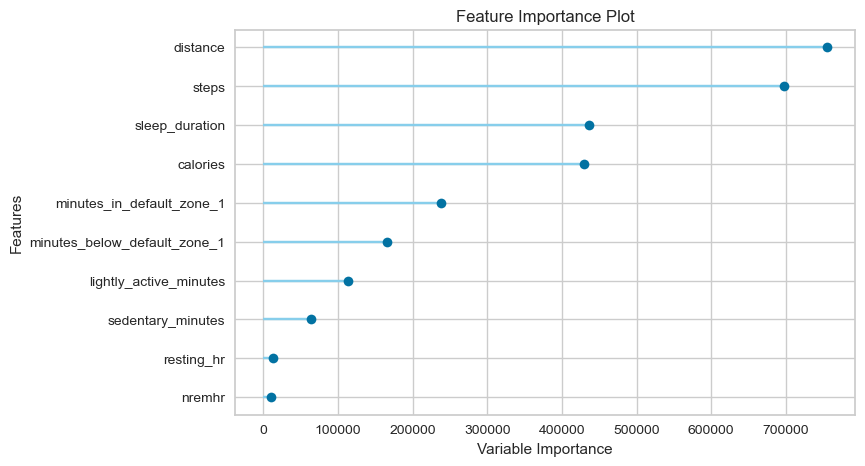

In [44]:
plot_model(best, plot='feature')

In [45]:
data = preprocessing_functions.post_preprocessing(data)

In [46]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [47]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5747,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133
gbc,Gradient Boosting Classifier,0.5669,0.6315,0.4987,0.5089,0.4887,0.1276,0.1343,0.2867
svm,SVM - Linear Kernel,0.5548,0.0000,0.3333,0.1567,0.2132,0.0000,0.0000,0.0333
lightgbm,Light Gradient Boosting Machine,0.5501,0.5918,0.5217,0.4884,0.4912,0.1003,0.1066,0.0700
rf,Random Forest Classifier,0.5441,0.5139,0.4588,0.4897,0.4467,0.0833,0.0945,0.1100
lr,Logistic Regression,0.5416,0.4687,0.0590,0.0929,0.0722,-0.0265,-0.0278,0.0133
ada,Ada Boost Classifier,0.5385,0.6261,0.5940,0.4909,0.5208,0.1124,0.1158,0.0967
et,Extra Trees Classifier,0.5367,0.5052,0.4290,0.4653,0.4307,0.0573,0.0624,0.0933
nb,Naive Bayes,0.5355,0.5021,0.2891,0.4364,0.3437,0.0091,0.0110,0.0133
qda,Quadratic Discriminant Analysis,0.5265,0.5327,0.3594,0.4308,0.3887,0.0071,0.0055,0.0167


# BMI prediction

In [54]:
data = fitbit.drop(columns=['age', 'gender'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [55]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [56]:
s = setup(data=train_data, target='bmi', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,bmi
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3308, 63)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [57]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5010,0.3333,0.5000,0.3418,0.4316,0.0000,0.0000,0.8533
svm,SVM - Linear Kernel,0.3244,0.0000,0.5000,0.2460,0.3017,0.0000,0.0000,0.9433
